<a href="https://colab.research.google.com/github/ktichola/ML-and-DL-to-Gravitational-waves-analysis/blob/main/Generate_noise_gravitational_waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'g2net-detecting-continuous-gravitational-waves:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F37077%2F4333111%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240505%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240505T191830Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0245ed32d889c40b8dec1f0544efc48cdca81496a2a22c2f3df59a4ada8e09b992227a1c3764bfe7012a3ff509d5809b19cf27845738bee760b167ecae0d585db52312181521e56a224a54f34b0f109b1d2e265f864a908456adcd2106db36c6ef63013b63e17b9f34179e99bbf97d849042494d9d6e04f6baa606c60d8bdb5773ba0838d14891832dd45bb15eb5ad5812ab127a59b239a283c343c277896c951d12c3635bc594076fad6b9e0cec0164480d7db7bc8fc8c4158454c6236dada6a4fa4a084de0f123f36dd0d01d9124170a98290e168128afe936c33f8f96aa133f216fae5b32e76be700e8c08347fef475d40ad99f38ffb45d6d3a5b05956729'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# Here is a simple script to generate gravitational waves.

Seted up two gravitational wave detectors 90 degrees apart.

You can simply set the preprocessing method.

The default preprocessing method is to take the absolute value, normalize it, and compress it.

Also, include the method of generating noise.

Output to /kaggle/working/signal and /kaggle/working/noise


# Install module and import

In [ ]:
!pip install git+https://github.com/PyFstat/PyFstat@python37

  Cloning https://github.com/PyFstat/PyFstat (to revision python37) to /tmp/pip-req-build-u1c_k_o7
  Running command git clone --filter=blob:none --quiet https://github.com/PyFstat/PyFstat /tmp/pip-req-build-u1c_k_o7
  Running command git checkout -b python37 --track origin/python37
  Switched to a new branch 'python37'
  Branch 'python37' set up to track remote branch 'python37' from 'origin'.
  Resolved https://github.com/PyFstat/PyFstat to commit 73ad1acdc9385a234727abf3eb9f93c9298fc5e5
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 3.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyFstat: filename=PyFstat-1.18.

In [ ]:
import numpy as np
import pandas as pd
import torch as tc
import pyfstat,sys,os,io,cv2,warnings
from pyfstat.utils import get_sft_as_arrays
from typing import TYPE_CHECKING, Iterable, Optional
import logging,shutil,tqdm
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

# Clear unnecessary log

In [ ]:
"""fc:"set_up_logger" is come from https://www.kaggle.com/code/crischir/pyfstat-tutorial-adapted-to-kaggle"""
def set_up_logger(
    outdir: Optional[str] = None,
    label: Optional[str] = "pyfstat",
    log_level: str = "INFO",  # FIXME: Requires Python 3.8 Literal["CRITICAL", "ERROR", "WARNING", "INFO", "DEBUG"] = "INFO",
    streams: Optional[Iterable["io.TextIOWrapper"]] = (sys.stdout,),
    append: bool = True,
) -> logging.Logger:
#     """Add file and stream handlers to the `pyfstat` logger.
#     Handler names generated from ``streams`` and ``outdir, label``
#     must be unique and no duplicated handler will be attached by
#     this function.
#     Parameters
#     ----------
#     outdir:
#         Path to outdir directory. If ``None``, no file handler will be added.
#     label:
#         Label for the file output handler, i.e.
#         the log file will be called `label.log`.
#         Required, in conjunction with ``outdir``, to add a file handler.
#         Ignored otherwise.
#     log_level:
#         Level of logging. This level is imposed on the logger itself and
#         *every single handler* attached to it.
#     streams:
#         Stream to which logging messages will be passed using a
#         StreamHandler object. By default, log to ``sys.stdout``.
#         Other common streams include e.g. ``sys.stderr``.
#     append:
#         If ``False``, removes all handlers from the `pyfstat` logger
#         before adding new ones. This removal is not propagated to
#         handlers on the `root` logger.
#     Returns
#     -------
#     obj:
#         Configured instance of the ``logging.Logger`` class.
#     """
    logger = logging.getLogger("pyfstat")
    logger.setLevel(log_level)

    if not append:
        for handler in logger.handlers:
            logger.removeHandler(handler)
    else:
        for handler in logger.handlers:
            handler.setLevel(log_level)

    stream_names = [
        handler.stream.name
        for handler in logger.handlers
        if type(handler) == logging.StreamHandler
    ]
    file_names = [
        handler.baseFilename
        for handler in logger.handlers
        if type(handler) == logging.FileHandler
    ]

    common_formatter = logging.Formatter(
        "%(asctime)s.%(msecs)03d %(name)s %(levelname)-8s: %(message)s",
        datefmt="%y-%m-%d %H:%M:%S",  # intended to match LALSuite's format
    )

    for stream in streams or []:
        if stream.name in stream_names:
            continue
        stream_handler = logging.StreamHandler(stream)
        stream_handler.setFormatter(common_formatter)
        stream_handler.setLevel(log_level)
        logger.addHandler(stream_handler)

    if label and outdir:
        os.makedirs(outdir, exist_ok=True)
        log_file = os.path.join(outdir, f"{label}.log")

        if log_file not in file_names:

            file_handler = logging.FileHandler(log_file)
            file_handler.setFormatter(common_formatter)
            file_handler.setLevel(log_level)
            logger.addHandler(file_handler)

    return logger


In [ ]:
def Normalization(x:tc.Tensor)->tc.Tensor:
    """input.shape=(batch,f1,f2,...)"""
    #[batch,f1,f2]->dim[1,2]
    dim=list(range(1,x.ndim))
    mean=x.mean(dim=dim,keepdim=True)
    var=x.std(dim=dim,keepdim=True)
    return (x-mean)/var

# Generate gravitational waves

In [ ]:
def generate(signal_rate=0.01)->np.ndarray:
    """signal_rate must >=0
        output=[H1_signal,L1_signal]
        """
    writer_kwargs = {
        "label": "single_detector_gaussian_noise",
        "outdir": "PyFstat_example_data",
        "tstart": 1238166018,
        "duration": 365 * 86400,
        "detectors": "H1",
        "sqrtSX": 1e-22,
        "Tsft": 1800,
        "SFTWindowType": "tukey",
        "SFTWindowBeta": 0.01,
    }
    signal_parameters = {
        "F0": np.random.randint(50,500),#meta_data_arange=(50,400)
        "F1": -1e-9*(1+np.random.randn()*0.01),#[-1e-9,0]
        "Alpha": 2*np.pi*np.random.rand(),#(0,2pi)
        "Delta": np.pi*(0.5-np.random.rand()),#[-pi/2,pi/2]
        "h0": 1e-22*signal_rate,
        "cosi": 1-2*np.random.rand()*0,#(-1,1)Affects signal strength
        "psi": 0.5*np.pi*(0.5-np.random.rand()),#(-pi/4,pi/4)
        "phi": 2*np.pi*np.random.rand(),#(0,2pi)
        "tref": writer_kwargs["tstart"],
    }

    writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
    writer.make_data()# Create SFTs

    frequency, timestamps, fourier_data_H1 = get_sft_as_arrays(writer.sftfilepath)#H1_detector

    signal_parameters["psi"]=signal_parameters["psi"]+np.pi/2#90 degree
    writer = pyfstat.Writer(**writer_kwargs, **signal_parameters)
    writer.make_data()

    frequency, timestamps, fourier_data_L1 = get_sft_as_arrays(writer.sftfilepath)#L1_detector


    ####preprocessing method
    fourier_data_H1["H1"]/=fourier_data_H1["H1"].mean()
    fourier_data_L1["H1"]/=fourier_data_L1["H1"].mean()

    output_H=fourier_data_H1["H1"].real**2+fourier_data_H1["H1"].imag**2
    #L1 is another detector with a 90 degree difference
    output_L=fourier_data_L1["H1"].real**2+fourier_data_L1["H1"].imag**2

    ####compress gravitational waves to speed up training
    output=np.stack((output_H,output_L),axis=0)

    output=output.transpose(1,2,0)
    #output.shape=(200~360(perhaps),17520, 2)
    output=cv2.resize(output,(3500,360)).transpose(2,0,1)#Compression_ratio=17520/3500~=5

    return frequency,Normalization(tc.from_numpy(output))

# The output path

In [ ]:
"""path settings"""

logger = set_up_logger(label="0_generating_noise", log_level="WARNING")
file_path="/kaggle/working/"
try:
    os.mkdir(path=file_path+"signal")
    os.mkdir(path=file_path+"noise")
except:
    shutil.rmtree(file_path+"signal")#delete folder
    shutil.rmtree(file_path+"noise")#delete folder
    os.mkdir(path=file_path+"signal")
    os.mkdir(path=file_path+"noise")

# Show gravitational waves

torch.Size([2, 360, 3500])


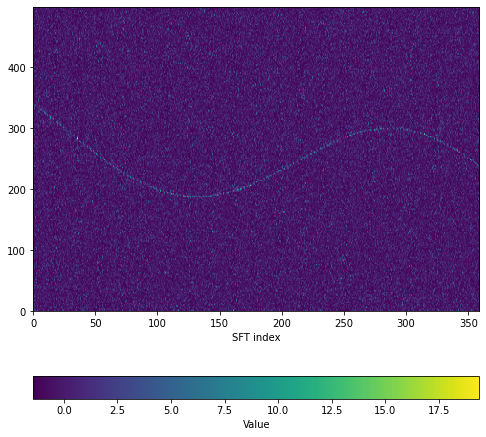

In [ ]:
"""show Generate noisy gravitational waves signal_rate=0.1"""
frequency,output=generate(signal_rate=0.1)
print(output.shape)
output=output.numpy().transpose(1,2,0)
output=cv2.resize(output,(500,360)).transpose(2,0,1)

fig, ax = plt.subplots(1,1,figsize=(8, 8))
ax.set(xlabel="SFT index")
c = ax.pcolorfast(np.arange(output.shape[1]),np.arange(output.shape[2]), output[0])
fig.colorbar(c, ax=ax, orientation="horizontal", label="Value")
fig

# Output gravitational waves

In [ ]:
"""In this script, noisy gravitational waves (signal_rate=0.01) are generated in /kaggle/working/signal
     Generate noise without gravitational waves in /kaggle/working/noise"""

total=100#noise_generate_time+signal_generate_time
signal_rate=100

time=tqdm.tqdm(total=total)
for i in range(total//2):
    frequency,output=generate(signal_rate=signal_rate)#Generate noisy gravitational waves
    #output:tc.Tensor to np.ndarray ->output.numpy()
    tc.save(output,file_path+f"signal/_{i}.pth")
    frequency,output=generate(0)#Generate noisy
    tc.save(output,file_path+f"noise/_{i}.pth")
    time.update(2)


100%|██████████| 100/100 [12:04<00:00,  7.24s/it]

100%|██████████| 100/100 [11:39<00:00,  6.93s/it]